In [1]:
import numpy as np
from scipy.stats import binom_test
from scipy.stats import hypergeom
from scipy.stats import bernoulli 


### Number of possible motif pairs can be very large. To reduce computing time, a filtering process is needed

select a random 100 foreground interactions and 100 background interactions. Using 8 cores, tested on the OSC, the speed is 2.7M values per 1 minute. With 64K motif pairs and 200 interactions, the whole process can be finished within 5 minutes.

### filter based on foreground coverage

### We hope final motif pairs have foreCov > 30%
We don't need to inspect every MP on the total 30k foreground interactions, that's too slow. 


In [28]:
hypergeom.sf(15-1, 30000, 9000, 100)

0.999845875362735

The above formulation indicates that, we used a small fraction to filter motif pairs, one of the goal is to select MP foreCov >= 30%. Since we take a 100 small samples, if the orignal sample size is as large as 30k, using a threshold=10, we still have 0.999 chance that we kept the MP where its foreCOV > 30%.

### We hope final motif pairs have foreCov - backCov > 10%

In [7]:
def simulation(k,x,y):
    P = np.random.binomial(1, x, k)
    N = np.random.binomial(1, y, k)
    P_cov = float(sum(P))/k
    N_cov = float(sum(N))/k
    return P_cov-N_cov

In [13]:
np.random.binomial(1, 0.3, 100)

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

0.061604307118541285


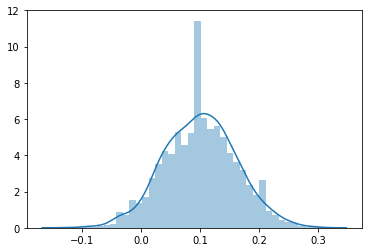

In [9]:
import matplotlib
%matplotlib inline
import seaborn as sns
samples = list(map(lambda x:simulation(100,0.3,0.2),range(3000)))
print (np.std(samples))
sns.distplot(samples)

In [10]:
from scipy.stats import norm 

### By the CLT, the diff value is normally distributed

In [24]:
import pandas as pd
result_list = []
for x in [0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    for y in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
        samples = list(map(lambda xx:simulation(100,x,y),range(3000)))
        sf = norm(np.mean(samples),np.std(samples)).sf(-0.1)
        diff = x-y
        result_list.append([x,y,diff,sf])
        print (x,y,diff,sf)

0.3 0.1 0.19999999999999998 0.9999999856631749
0.3 0.2 0.09999999999999998 0.9994754275057627
0.3 0.3 0.0 0.9403402409114583
0.3 0.4 -0.10000000000000003 0.5043035802364136
0.3 0.5 -0.2 0.06920605186581552
0.3 0.6 -0.3 0.0013718685929063998
0.3 0.7 -0.39999999999999997 2.0914494650800905e-06
0.3 0.8 -0.5 2.2835525141875867e-11
0.3 0.9 -0.6000000000000001 1.8632300175805536e-20
0.4 0.1 0.30000000000000004 0.9999999999987884
0.4 0.2 0.2 0.999997897367799
0.4 0.3 0.10000000000000003 0.998416373700431
0.4 0.4 0.0 0.930750114870647
0.4 0.5 -0.09999999999999998 0.5032093622781317
0.4 0.6 -0.19999999999999996 0.07715773439541784
0.4 0.7 -0.29999999999999993 0.001395809700858149
0.4 0.8 -0.4 1.2300487886069512e-06
0.4 0.9 -0.5 2.202238715385786e-12
0.5 0.1 0.4 1.0
0.5 0.2 0.3 0.9999999997680307
0.5 0.3 0.2 0.9999943772010853
0.5 0.4 0.09999999999999998 0.9977828337335161
0.5 0.5 0.0 0.9180215423043754
0.5 0.6 -0.09999999999999998 0.5110425263783788
0.5 0.7 -0.19999999999999996 0.07479922186910

In [25]:
df = pd.DataFrame(result_list)

In [26]:
df.columns = ['x','y','diff','prob']

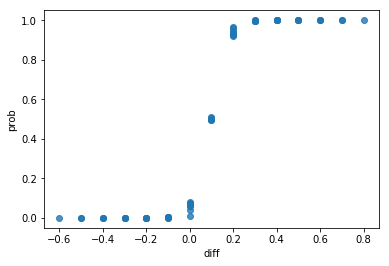

In [23]:
sns.regplot('diff','prob',df,fit_reg = False)

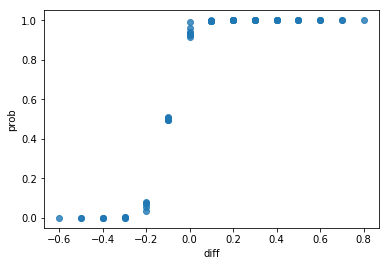

In [27]:
sns.regplot('diff','prob',df,fit_reg = False)

In [33]:
df[df['diff']>0].mean()

x       0.680000
y       0.340000
diff    0.340000
prob    0.999746
dtype: float64

The above formulation indicates that, we used a small fraction to filter motif pairs, one of the goal is to select MP foreCov-backCov >= 10%. Since we take a 100 small samples for each fore and back, if we use a threshold -1, we still have 0.999 chance that we kept the MP where its diff > 10%.